<a href="https://colab.research.google.com/github/aromaldev/OCR-Malayalam/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

Parameters (Found by Hyperparameter Optimization)

kernel  = rbf <br>
C = 1000 <br>
gamma = 0.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### DATASET

44 Classes :- 1000 Images from Each Class

Dataset Mapping :- dataset.target_names

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import filters
import cv2
import pandas as pd
from sklearn.utils import Bunch
from sklearn.metrics import classification_report,plot_confusion_matrix

In [ ]:
% mkdir data
% cd data
! unrar x /content/drive/MyDrive/data/OCRDATASET.rar

Streaming output truncated to the last 5000 lines.
Extracting  CHAR41/MD2091.jpg                                             95%  OK 
Extracting  CHAR41/MD2092.jpg                                             95%  OK 
Extracting  CHAR41/MD2093.jpg                                             95%  OK 
Extracting  CHAR41/MD2094.jpg                                             95%  OK 
Extracting  CHAR41/MD2095.jpg                                             95%  OK 
Extracting  CHAR41/MD2096.jpg                                             95%  OK 
Extracting  CHAR41/MD2097.jpg                                             95%  OK 
Extracting  CHAR41/MD2098.jpg                                             95%  OK 
Extracting  CHAR41/MD2099.jpg                                             95%  OK 
Extracting  CHAR41/MD21.jpg                                               95%  OK 
Extracting  CHAR41/MD210.jpg 

In [ ]:
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
from pathlib import Path

def load_image_files(container_path, dimension=(30, 30)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Malayalam Character classification dataset"
    df = []
    target = []
    for i, direc in enumerate(folders):
        j = 0
        for file in direc.iterdir():
            try:
              img = rgb2gray(imread(file))
              img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
              df.append(img_resized.flatten())
              target.append(i)
            except:
              print(file)
              continue
            j += 1
            if j == 1000:
              break
        print(f'Folder {i + 1} of {len(folders)} Retrieved')
    target = np.array(target)
    df = np.array(df)
    return Bunch(data=df,
                 target=target,
                 target_names=categories,
                 DESCR=descr)


dataset = load_image_files("./")

Folder 1 of 44 Retrieved
Folder 2 of 44 Retrieved
Folder 3 of 44 Retrieved
Folder 4 of 44 Retrieved
Folder 5 of 44 Retrieved
Folder 6 of 44 Retrieved
Folder 7 of 44 Retrieved
Folder 8 of 44 Retrieved
Folder 9 of 44 Retrieved
Folder 10 of 44 Retrieved
Folder 11 of 44 Retrieved
Folder 12 of 44 Retrieved
Folder 13 of 44 Retrieved
Folder 14 of 44 Retrieved
Folder 15 of 44 Retrieved
Folder 16 of 44 Retrieved
Folder 17 of 44 Retrieved
Folder 18 of 44 Retrieved
Folder 19 of 44 Retrieved
Folder 20 of 44 Retrieved
Folder 21 of 44 Retrieved
Folder 22 of 44 Retrieved
Folder 23 of 44 Retrieved
Folder 24 of 44 Retrieved
Folder 25 of 44 Retrieved
Folder 26 of 44 Retrieved
Folder 27 of 44 Retrieved
Folder 28 of 44 Retrieved
Folder 29 of 44 Retrieved
Folder 30 of 44 Retrieved
Folder 31 of 44 Retrieved
Folder 32 of 44 Retrieved
Folder 33 of 44 Retrieved
Folder 34 of 44 Retrieved
Folder 35 of 44 Retrieved
Folder 36 of 44 Retrieved
Folder 37 of 44 Retrieved
Folder 38 of 44 Retrieved
Folder 39 of 44 Retri

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(dataset.data,dataset.target,random_state=123)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,shuffle=True)
print(f''' Dimensions
X Train :- {train_x.shape}
Y Train :- {train_y.shape}
X Test  :- {val_x.shape}
Y Test :- {val_y.shape}
''')

 Dimensions
X Train :- (33000, 900)
Y Train :- (33000,)
X Test  :- (11000, 900)
Y Test :- (11000,)



#### Training

In [ ]:
model = SVC(kernel='rbf' , gamma=0.1, C=1000,verbose=True)
model.fit(train_x, train_y)

[LibSVM]

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

#### Serializing

In [ ]:
import joblib

In [ ]:
joblib.dump(model, '/content/drive/MyDrive/data/libsvm.joblib')

['/content/drive/MyDrive/data/libsvm.joblib']

In [ ]:
model = joblib.load('/content/drive/MyDrive/data/libsvm.joblib')

#### Testing

In [ ]:
y_pred = model.predict(val_x)

##### Classification Report

In [ ]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       238
           1       0.99      0.97      0.98       226
           2       0.98      0.95      0.97       246
           3       0.95      0.99      0.97       236
           4       0.93      0.92      0.92       241
           5       0.99      0.98      0.98       263
           6       0.96      0.99      0.98       252
           7       0.97      0.94      0.95       248
           8       0.97      0.98      0.98       239
           9       0.66      0.98      0.79       245
          10       0.98      0.96      0.97       244
          11       0.98      0.96      0.97       250
          12       1.00      0.95      0.97       248
          13       0.95      0.97      0.96       238
          14       0.99      0.93      0.96       245
          15       0.98      0.97      0.98       258
          16       0.97      0.96      0.97       231
          17       0.99    

##### Confusion Matrix

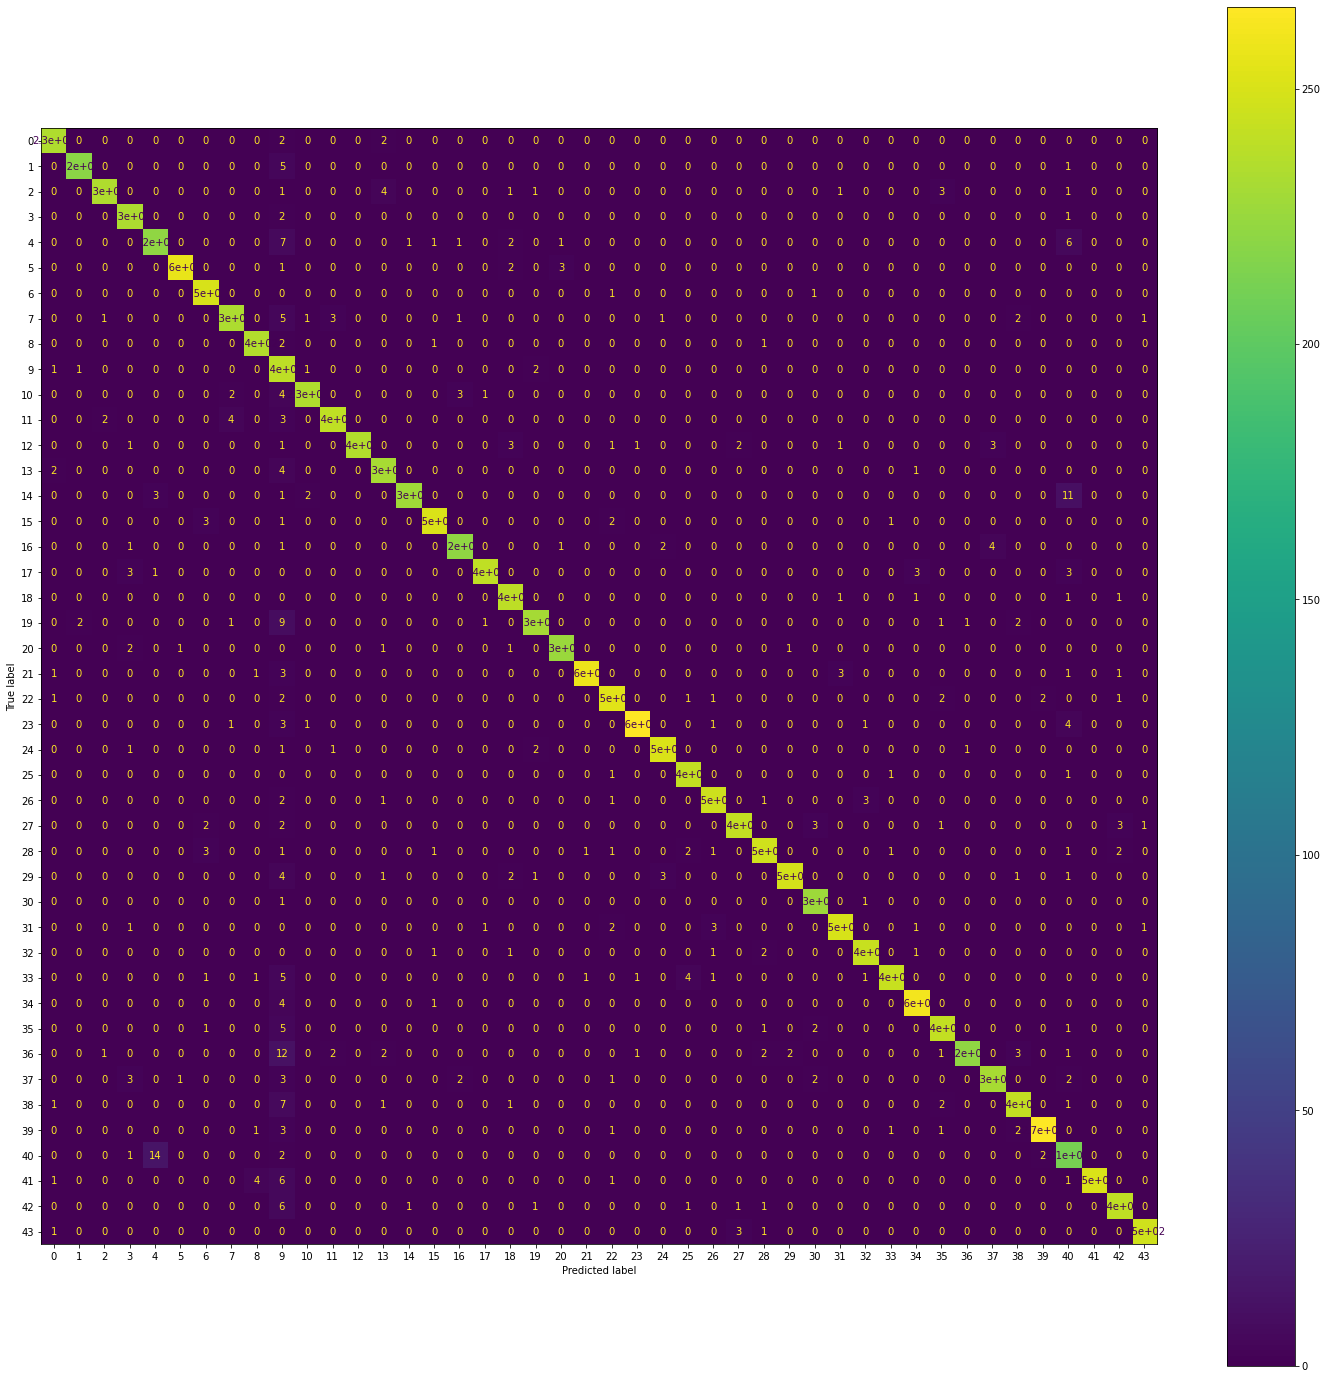

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
plot_confusion_matrix(model,val_x, val_y, ax=ax)
plt.show()

In [ ]:
{i:j for i,j in enumerate(dataset.target_names)}

{0: 'CHAR11',
 1: 'CHAR17',
 2: 'CHAR24',
 3: 'CHAR29',
 4: 'CHAR6',
 5: 'CHAR21',
 6: 'CHAR19',
 7: 'CHAR18',
 8: 'CHAR5',
 9: 'CHAR2',
 10: 'CHAR15',
 11: 'CHAR23',
 12: 'CHAR25',
 13: 'CHAR28',
 14: 'CHAR12',
 15: 'CHAR20',
 16: 'CHAR41',
 17: 'CHAR14',
 18: 'CHAR27',
 19: 'CHAR1',
 20: 'CHAR22',
 21: 'CHAR10',
 22: 'CHAR33',
 23: 'CHAR38',
 24: 'CHAR31',
 25: 'CHAR26',
 26: 'CHAR35',
 27: 'CHAR4',
 28: 'CHAR8',
 29: 'CHAR40',
 30: 'CHAR39',
 31: 'CHAR37',
 32: 'CHAR43',
 33: 'CHAR32',
 34: 'CHAR36',
 35: 'CHAR9',
 36: 'CHAR13',
 37: 'CHAR30',
 38: 'CHAR34',
 39: 'CHAR16',
 40: 'CHAR7',
 41: 'CHAR42',
 42: 'CHAR44',
 43: 'CHAR3'}

##### Testing with Individual Images

In [ ]:
df = []

file = "/content/data/CHAR3/MD1056.jpg"
dimension = (30,30)

img = rgb2gray(imread(file))
img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
df.append(img_resized.flatten())

df = np.array(df)

In [ ]:
dataset.target_names[model.predict(df)[0]]

'CHAR3'

In [ ]:
df = []

file = "/content/data/CHAR20/MD1056.jpg"
dimension = (30,30)

img = rgb2gray(imread(file))
img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
df.append(img_resized.flatten())

df = np.array(df)

In [ ]:
dataset.target_names[model.predict(df)[0]]

'CHAR20'